# Сегментация пользователей банка

# Материалы: 
* Презентация, https://docs.google.com/presentation/d/1xymxqY5yRF3G_J0UPfZJRWV5ZZIHDEtpEi-Kkowhbvo/edit?usp=sharing
* Дашборд: https://public.tableau.com/views/_16711085535450/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

**Заказчик:** "Метанпромбанк"

**Цель:** уменьшение оттока клиентов банка. 

**Задачи:**
* сегментация текущих пользователей Банка
* выдвижение рекомендаций и наиболее подходящих предложений клиентам из каждого сегмента для уменьшения оттока

**Гипотезы:**
* Средний доход клиентов, которые пользуются двумя продуктами, и тех, у кого только один продукт, равны.
* Доли клиентов с кредитной картой, имеющих один продукт и клиентов, у которых их два, равны.

**Ход выполнения:**
1. Знакомство с данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Сегментация пользователей
5. Проверка гипотез
6. Формулировка выводов и рекомендаций

## Знакомство с данными

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth

sns.set_palette('pastel')

In [ ]:
#посмотрим, какие данные у нас есть
data = pd.read_csv('bank_dataset.csv')

data.info()

#изменим названия столбцов для удобства 
data.columns = data.columns.str.lower() 
data = data.rename(columns = {'userid':'user_id', 'creditcard':'credit_card'})

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#посмотрим описание данных
data.describe(include= 'all')

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573368e+07,650.528800,NaN,NaN,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,NaN,NaN,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,NaN,NaN,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,NaN,NaN,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

**Выводы**

У нас есть **10 000** строк с информацией о пользователях Банка в городах Ярославль, Ростов Великий и Рыбинск и **11** столбцов, описывающих клиентов и их действия.   
Только столбец с текущим балансом (balance) имеет пропуски.   
Все данные представлены в верном формате.

Наш **"медианный" пользователь** - это человек около 39 лет, имеющий 1 или 2 продукта в банке, баланс на карте более 100 000.   
Заметны выбросы (например, зарплата 11 рублей или 10 объектов в собственности), их мы проработаем в следующем блоке. 

## Предобработка данных

### Категоризация данных

Разделим пользователей на несколько различных категорий для удобства дальнейшей обработки и поиска закономерностей в их поведении.

In [ ]:
#выделим категорию возраста, добавив банковский критерий: 
#многие выдают кредитные карты/ипотеки с 21-23 лет и перестают после 65-75,
#поэтому выделим их в отдельные группы

def age_group(age):
    if age <=23:
        return '18-23'
    if age >23 and age <=35:
        return '24-35'
    if age >35 and age <=50:
        return '36-50'
    if age >50 and age <65:
        return '51-65'
    if age >=65:
        return '65+'

data['age_group'] = data['age'].apply(age_group)

In [ ]:
#добавим категоризацию по уровню зарплаты

#посмотрим, сильно ли отличается доход по регионам
print(data.groupby('city')['estimated_salary'].median())

#разница в средней и медианной зарплате между городами небольшая, поэтому можно не формировать разные диапазоны для них
#возьмем цифры из описания данных в первом блоке

def salary_group (salary):
    if salary <=51000:
        return 'низкий доход'
    if salary >=149000:
        return 'высокий доход'
    return 'средний доход'

data['salary_group'] = data['estimated_salary'].apply(salary_group)

#проверяем
data.head()

city
Ростов Великий    102397.22
Рыбинск            99984.86
Ярославль          99132.31
Name: estimated_salary, dtype: float64


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_group,salary_group
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,36-50,средний доход
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,36-50,средний доход
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,36-50,средний доход
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,36-50,средний доход
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,36-50,средний доход


### Проверка дубликатов

In [ ]:
data.duplicated().sum()

0

Явных(полных) дубликатов не обнаружено.

Все представленные данные о пользователях могут быть одинаковыми у разных людей, кроме их id. Посмотрим, не попал ли один и тот же человек в датасет повторно.

In [ ]:
data['user_id'].duplicated().sum()

0

Повторы в представленных данных отсутствуют.

### Изучение пропусков

Пропуски есть только в столбце с текущим балансом карты. Это может быть отсутствие средств у клиента или неполнота данных у банка. Попробуем определить закономерности этих пропусков.

In [ ]:
#создадим временную переменную для датафрейма со строками, где отсутствуют данные о балансе карты
b = data[data['balance'].isna()==True]

print('Отсутствие данных о балансе в разрезе городов')
print(b['city'].value_counts())
print()

print('Отсутствие данных о балансе в разрезе возраста')
print(b['age_group'].value_counts())
print()

print('Отсутствие данных о балансе в разрезе доходов')
print(b['salary_group'].value_counts())
print()

print('Отсутствие данных о балансе в разрезе активности пользователей')
print(b['loyalty'].value_counts())
print()

print('Отсутствие данных о балансе в разрезе оставшихся и ушедших пользователей')
print(b['churn'].value_counts())

Отсутствие данных о балансе в разрезе городов
Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

Отсутствие данных о балансе в разрезе возраста
36-50    1621
24-35    1455
51-65     303
18-23     127
65+       111
Name: age_group, dtype: int64

Отсутствие данных о балансе в разрезе доходов
средний доход    1795
низкий доход      927
высокий доход     895
Name: salary_group, dtype: int64

Отсутствие данных о балансе в разрезе активности пользователей
1    1873
0    1744
Name: loyalty, dtype: int64

Отсутствие данных о балансе в разрезе оставшихся и ушедших пользователей
0    3117
1     500
Name: churn, dtype: int64


Интересно, что в Ростове нет ни одного человека с нулевым балансом. То есть:
* проблема пропусков может быть со стороны банка (ошибки при сборе данных в Ярославле и Рыбинске) 
* либо в этих городах карты реже используются для хранения средств

Возраст чаще всего средний, хотя это связано с тем, что таких людей в принципе больше, как и со средним доходом.   
Примерно половина клиентов не активна, а 500 - покинули банк. 

In [ ]:
#проверим, есть ли пользователи, у которых на карте 0 рублей
data[data['balance']==0]['user_id'].count()

0

В данных нет клиентов, у которых на карте совсем не было бы денег, значит, вероятно, некоторые пропуски все же означают нулевой баланс. Заменим на 0 данные тех людей, которые уже покинули банк, остальным проставим медианное значение. Это нужно для того, чтобы баланс имел численний формат, и мы могли проводить расчеты в дальнейшем.

In [ ]:
data.loc[data['churn']==1,'balance'] = data.loc[data['churn']==1,'balance'].fillna(0)

data['balance'] = data['balance'].fillna(data['balance'].median())

### Исследование выбросов и аномалий

Проверим, нет ли необычных аномалий в столбцах с объектами в собственности, балансом счета и зарплатой.  
Также выбросы будут в информации о возрасте, однако даже самые высокие значения могут быть правдивыми. В других же столбцах имеются, в основном, категориальные данные. 

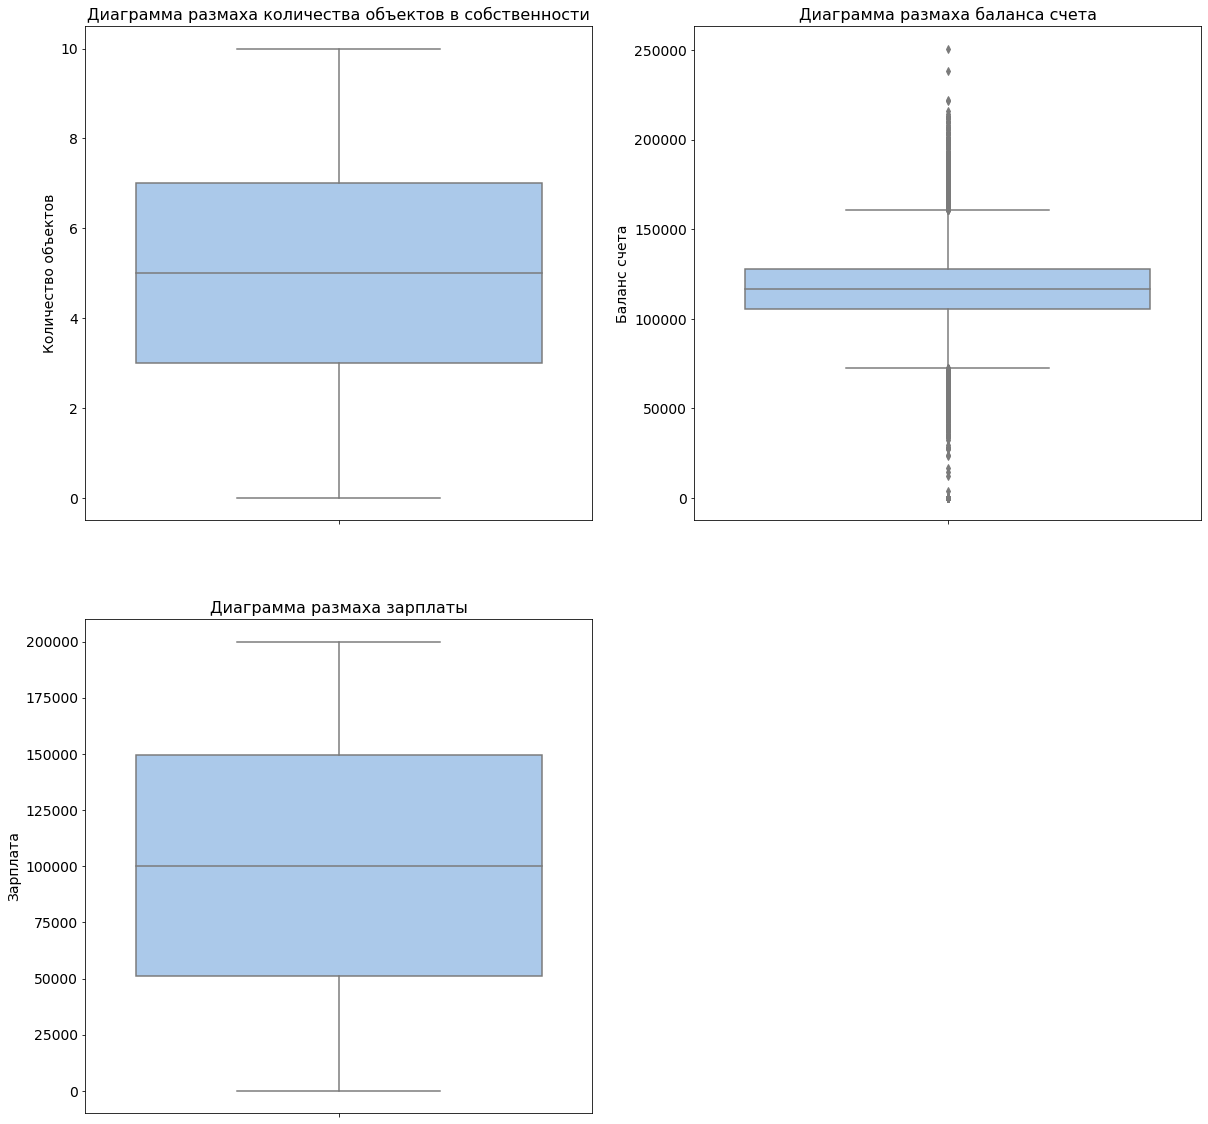

In [ ]:
#построим "ящики с усами" для интересующих нас столбцов
plt.figure(figsize=(20,20))

ax=plt.subplot(221)
sns.boxplot(y = 'objects', data = data)
plt.title('Диаграмма размаха количества объектов в собственности', fontsize = 16)
plt.ylabel('Количество объектов', fontsize = 14)
plt.yticks(fontsize = 14)

ax=plt.subplot(222)
sns.boxplot(y = 'balance', data = data)
plt.title('Диаграмма размаха баланса счета', fontsize = 16)
plt.ylabel('Баланс счета',fontsize = 14)
plt.yticks(fontsize = 14)

ax=plt.subplot(223)
sns.boxplot(y ='estimated_salary', data = data)
plt.title('Диаграмма размаха зарплаты', fontsize = 16)
plt.ylabel('Зарплата',fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

На графиках количества объектов и зарплаты не видно никаких аномалий, разброс данных равномерный. 
Только столбец с балансом имеет сильные выбросы ниже 75 000 и выше 275 000. 

In [ ]:
#посмотрим на цифры аномальных значений 
#напишем функцию расчета перцентилей

def anomaly_research(column):
    return np.percentile(column, [95,99])
    
data[['objects', 'balance', 'estimated_salary']].apply(anomaly_research)

,objects,balance,estimated_salary
0,9.0,162711.6690,190155.3755
1,10.0,185967.9854,198069.7345


Только 5% пользователей имеют 9 объектов в собственности, более 160 тысяч на счету и зарплату выше 190 тысяч. 
1% людей - 10 объектов, более 185 тысяч на счете и зарплату более 190 тысяч. Такие данные могут быть вполне реальными, к тому же, они не имеют неоправданно большого отличия от средних значений, а значит, не будут мешать нам в дальнейших исследованиях, оставим их в датасете.

**Выводы:**  
Данные очень хорошо собраны: в них отсутствуют дубликаты, пропуски имеются только в одном столбце: баланс карты, который, мы заполнили нулем для ушедших пользователей и медианными значениями для оставшихся (пропусков в городе Ростов Великий нет совсем, вероятно, там очень хорошо отлажена система сбора данных).  
В этом же столбце наблюдаются выбросы, которые могут быть верными, поэтому не стали избавляться от них. По другим данным аномальных значений не обнаружено.

## Исследовательский анализ данных. Отток клиентов. 

Посмотрим более подробно на категории пользователей, оценим, какие клиенты уходят из Банка чаще и от чего может зависеть.

In [ ]:
#создадим функцию для добавления подписей к графикам
def labels(label_x_name, label_y_name, title = ' ', title_size = 16, ticks_fontsize = 12,  labels_fontsize = 14, rotation = 0):
    plt.title(title, fontsize = title_size)
    plt.xticks(rotation = rotation, fontsize = ticks_fontsize)
    plt.yticks(fontsize = ticks_fontsize)
    plt.xlabel(label_x_name, fontsize = labels_fontsize)
    plt.ylabel(label_y_name, fontsize = labels_fontsize)

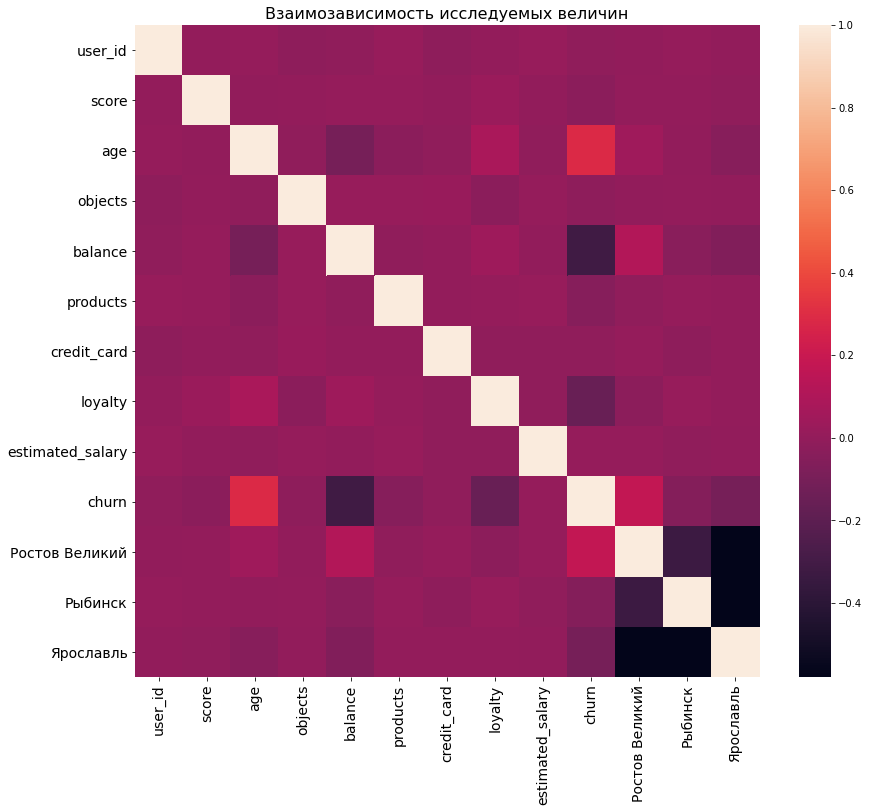

In [ ]:
#переведем категориальные значения городов в цифры, чтобы тоже отследить их на графике корреляции
one_hot = pd.get_dummies(data['city'])
data = pd.concat([data, one_hot], axis=1)

#посмотрим в целом на корреляцию величин
data.corr()

plt.figure(figsize=(14,12))
sns.heatmap(data.corr())
labels('', '', 'Взаимозависимость исследуемых величин', ticks_fontsize = 14, rotation = 90)

На первый взгляд, больше всего уход из банка (churn) зависит от возраста(прямая корреляция), баланса и активности клиента (обратная корреляция). 

Также наблюдается положительная корреляция между возрастом и активносью пользователей, и отрицательная - между возрастом и балансом на счете. 

В городах заметны зависимости с возрастом, балансом и уходом, причем в разных городах они разные: В Ростове все три положительные, а в Рыбинске и Ярославле - отрицательные. 

### Пол, возраст и город

Для начала проанализируем наших клиентов и посмотрим, как зависит отток клиентов от пола, возраста и месторасположения.

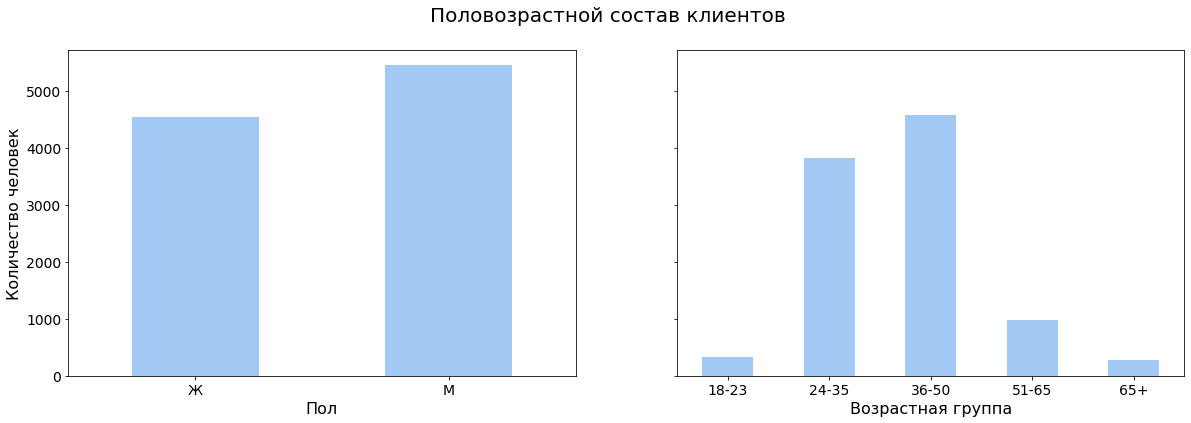

In [ ]:
#построим графики для определения половозрастного состав
plt.figure(figsize=(20,6))
plt.suptitle('Половозрастной состав клиентов', fontsize = 20)

ax = plt.subplot(121)
data.groupby(['gender'])['user_id'].count().plot(kind = 'bar')
labels('Пол', 'Количество человек', ticks_fontsize = 14,  labels_fontsize = 16)

plt.subplot(122, sharey = ax)
data.groupby(['age_group'])['user_id'].count().plot(kind = 'bar')
labels('Возрастная группа', 'Количество человек', ticks_fontsize = 14,  labels_fontsize = 16)

Мужчин больше, но ненамного: разница около 1000 человек.  
Чаще всего услугами банка пользуются люди среднего возраста (36-50), и молодежь (24-35). 

In [ ]:
#создадим функцию для отрисовки столбчатых диаграмм
def barplot_hue (column_x, column_y, hue, data = data):
    plt.figure(figsize=(9,6))
    sns.barplot(x = column_x, y = column_y, hue = hue, data = data)
    
#и такую же без третьего дополнительного параметра
def barplot (column_x, column_y, data = data):
    plt.figure(figsize=(9,6))
    sns.barplot(x = column_x, y = column_y, data = data)

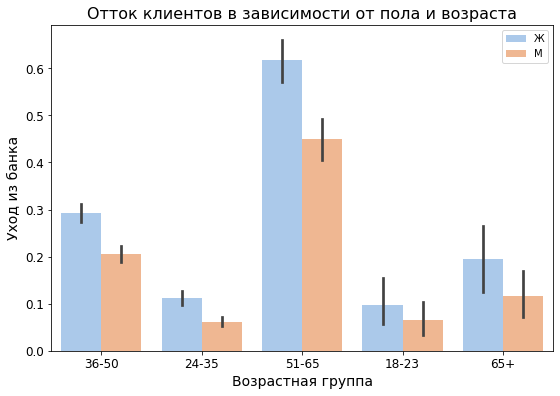

In [ ]:
#посмотрим, какие люди обычно уходят из банка
barplot_hue('age_group', 'churn', 'gender')
labels('Возрастная группа', 'Уход из банка', 'Отток клиентов в зависимости от пола и возраста')
plt.legend();

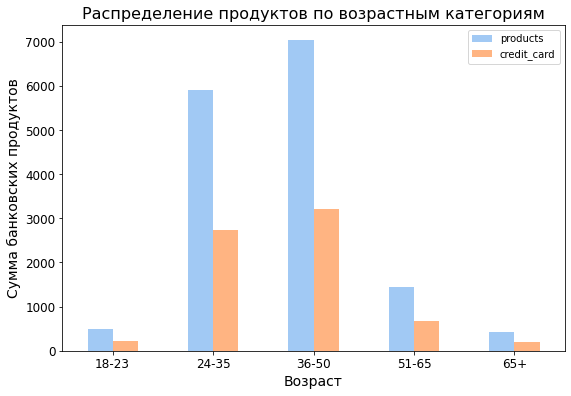

In [ ]:
#оценим количество банковских продуктов по возрастам
data['age_group'].value_counts()

data.groupby('age_group')[['products','credit_card']].sum().plot(kind = 'bar', figsize=(9,6))
labels('Возраст','Сумма банковских продуктов','Распределение продуктов по возрастным категориям');

Как мы и отметили ранее, больше всего продуктов и кредитных карт у людей среднего возраста, меньше всего - у молодежи до 23 лет и пожилых людей (старше 65). В части кредитных карт ситуация логичная: банки редко выдают кредиты этим категориям населения. 

In [ ]:
#посчитаем разницу между оттоком мужчин и женщин
round(data[data['gender']=='Ж']['churn'].mean()/data[data['gender']=='М']['churn'].mean(),1)

1.5

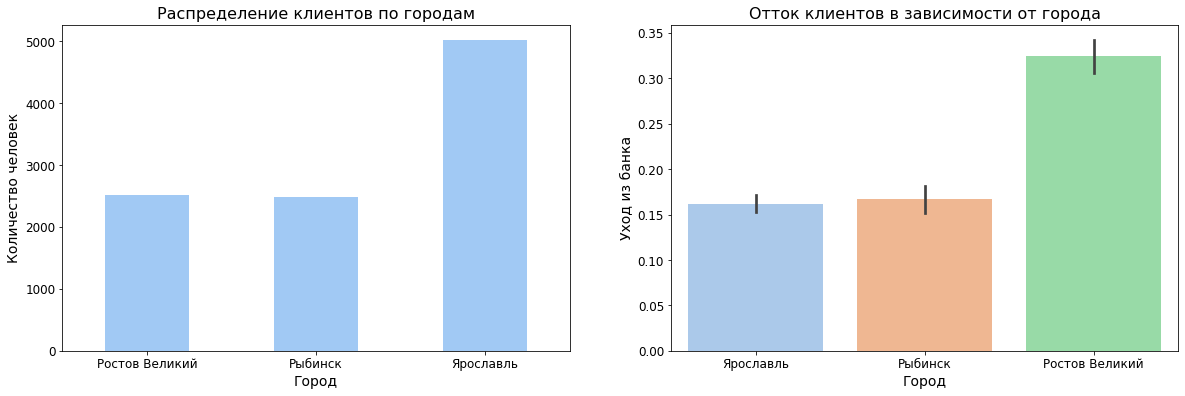

In [ ]:
#оценим распределение пользователей по городам
plt.figure(figsize=(20,6))

plt.subplot(121)
data.groupby(['city'])['user_id'].count().plot(kind = 'bar')
labels('Город', 'Количество человек', title = 'Распределение клиентов по городам')

#проверим, где чаще всего клиенты покидают банк
plt.subplot(122)
sns.barplot(x = 'city', y = 'churn', data = data)
labels('Город', 'Уход из банка', 'Отток клиентов в зависимости от города')

Интересное наблюдение: город, где находится больше всего пользователей (Ярославль), оказался самым стабильным (отток - чуть больше 15%), в Ростове же дела хуже всего - отток более 30%, хотя его численность одна из самых маленьких.   

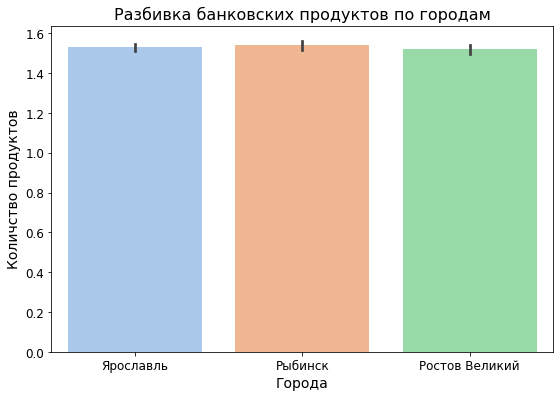

In [ ]:
#проверим, нет ли разницы между количеством продуктов в разных городах
barplot('city', 'products')
labels('Города', 'Количство продуктов', 'Разбивка банковских продуктов по городам')

Во всех трех регионах среднее число имеющихся у людей банковских продуктов - 1,5, разница между городами небольшая.

**Выводы:**  
Текущие клиенты: мужчин примерно на 1000 человек больше, чем женщин, возраст в основном средний (24-50 лет), самый многочисленный город - Ярославль. 

Самая лояльная аудитория - молодежь **(18-35)** и пенсионеры **(65+)**. Вероятно, для этих категорий на данный момент существуют выгодные предложения. К тому же пожилым людям может быть гораздо проще оставаться в одном месте, чем переходить в другие банки. 
   
Клиенты в возрасте **51-65** уходят практически в 6 раз чаще, чем молодежь, несмотря на то, что их меньше всего по численности. На втором месте по оттоку - люди среднего возраста (36-50). Есть смысл пересмотреть условия, которые мы даем этим клиентам по сравнению с крупными конкурентами. 

Мужчины в среднем в **1,5** раза чаще покидают банк, чем женщины. 

Пользователи банка в **Ярославле** реже, чем в других городах, уходят. Стоит обратить внимание на Ростов Великий, где самый высокий уровень оттока несмотря на низкую численность клиентов, вероятно филиалы Ярославля имеют большую стабильность приложения или более высокий уровень сервиса. 

### Доходы, баланс и собственность

Посмотрим на доходы, баланс на карте и объекты в собственности клиентов и определим, влияет ли это на уход из банка.

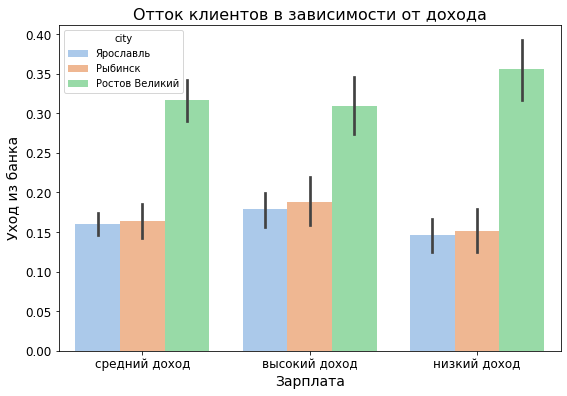

In [ ]:
#построим график оттока в разрезе зарплаты и возрастной группы по городам
barplot_hue('salary_group', 'churn', 'city')
labels('Зарплата', 'Уход из банка', 'Отток клиентов в зависимости от дохода')

Люди с высоким доходом покидают банк чуть чаще, чем с зарплатой ниже (уровень оттока чуть выше 20%). Вероятно, в банке не очень выгодные предложения по сбережению или инвестициям средств. Проверим, много ли накоплений есть у таких клиентов. В Ростове проблема выражена сильнее.

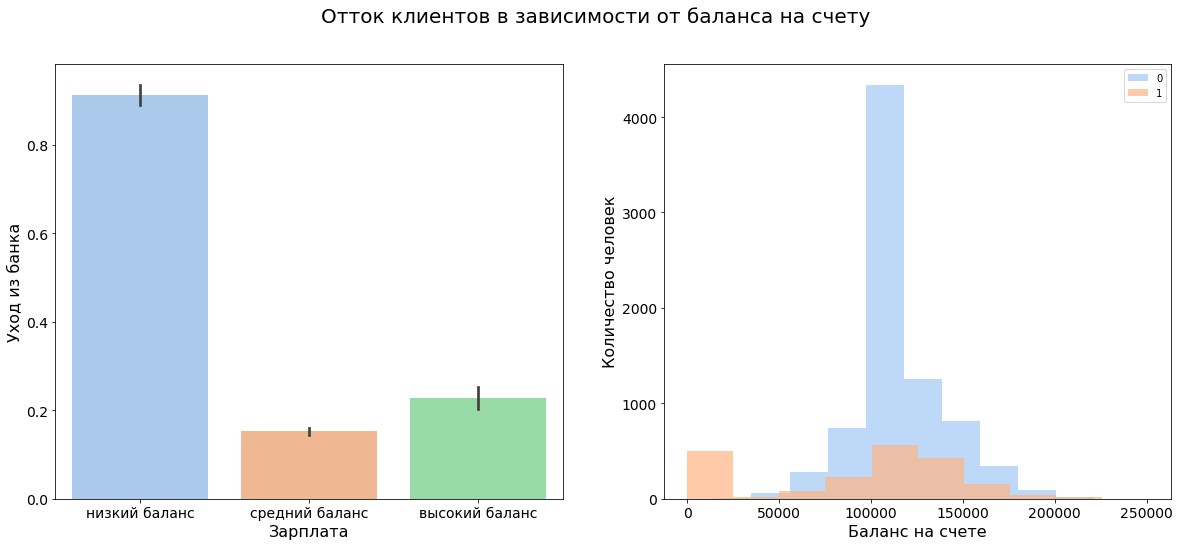

In [ ]:
#создадим категории балансов по аналогии с зарплатой

def balance_group (balance):
    if balance <=51000:
        return 'низкий баланс'
    if balance >=149000:
        return 'высокий баланс'
    return 'средний баланс'

data['balance_group'] = data['balance'].apply(balance_group)

plt.figure(figsize=(20,8))
plt.suptitle('Отток клиентов в зависимости от баланса на счету', fontsize = 20)

plt.subplot(121)
sns.barplot(x = 'balance_group', y = 'churn',data = data)
labels('Зарплата', 'Уход из банка',  ticks_fontsize = 14,  labels_fontsize = 16)

plt.subplot(122)
data.groupby('churn')['balance'].plot(kind = 'hist', alpha = 0.7)
labels('Баланс на счете', 'Количество человек',  ticks_fontsize = 14,  labels_fontsize = 16)
plt.legend()
plt.show()

Самым ненадежным оказался низкий баланс: отток более 80%. Отсутствие денег на счету может говорить об отсутствии лояльности со стороны клиента и его скором уходе. Больше всего остаются люди с балансом 100 - 120 тысяч.

In [ ]:
#посмотрим на корреляцию баланса на счету и зарплаты
data['balance'].corr(data['estimated_salary'])

-0.00528846914682861

Зависимости между уровнем дохода и балансом нет. Возможно, высокую зарплату клиенты хранят другим способом, либо в других банках. 

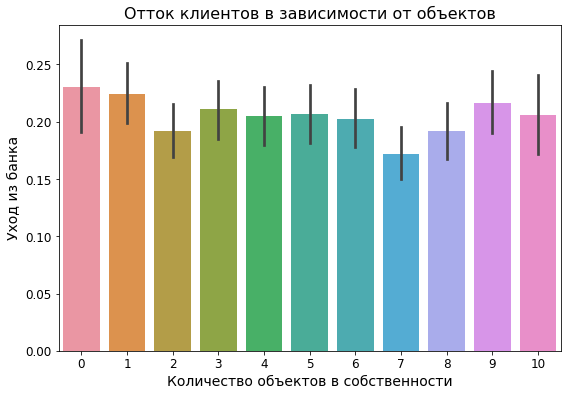

In [ ]:
#посмотрим на собственность пользователей
barplot('objects', 'churn')
labels('Количество объектов в собственности', 'Уход из банка', 'Отток клиентов в зависимости от объектов')


Чаще всего уходят пользователи без собственности или с одним объектом, реже всего - с семью. Соответственно, зависимости между количеством объектов и оттоком, не обнаружено.

**Выводы:**  
Больше всего внимания стоит обратить на людей с **высоким доходом**, которые чаще остальных покидают банк: более **20%** пользователей.  

Что качается денег на счету, отток больше всего заметен именно у тех клиентов, которые имеют **низкий баланс**: более **80%**. Зависимости между балансом и зарплатой не обнаружено. 

Самые стабильные пользователи - те, кто имеет 2 или 7 объектов в собственности. 

Рекомендация: пересмотреть текущие предложения по хранению и инвестициям средств. 

### Взаимодействие с банком

Рассмотрим, как сильно влияют на отток клиентов количество продуктов в банке, наличие кредитной карты и активность клиента.

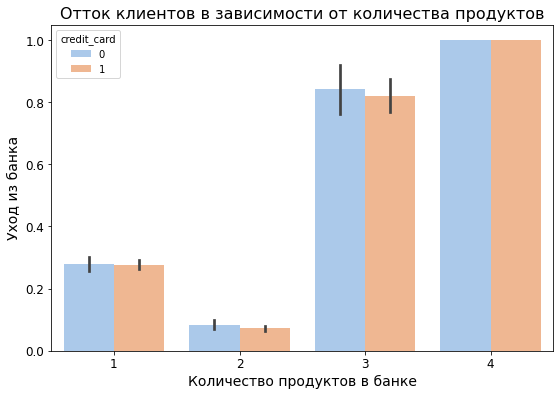

In [ ]:
barplot_hue('products','churn','credit_card')
labels('Количество продуктов в банке', 'Уход из банка', 'Отток клиентов в зависимости от количества продуктов')

Необычное наблюдение: абсолютно все пользователи, имеющие в банке четыре разных продукта, покинули банк, а те, у кого их три, уходят в 80% случаев. 
Те, у кого их всего 2, остаются гораздо чаще.

Наличие кредитной карты практически не влияет на отток. 

In [ ]:
#посмотрим, как много пользователей пользуются четырьмя продуктами
data[data['products']==4]['user_id'].count()

60

Менее 1% клиентов используют 4 продукта, следовательно, внутри банка может существовать проблема в обслуживании редких/непопулярных продуктов, например, счета или другие услуги в иностранных валютах или инвестиции.   
Проанализируем продукты подробнее в следующем разделе по сегментации пользователей. 

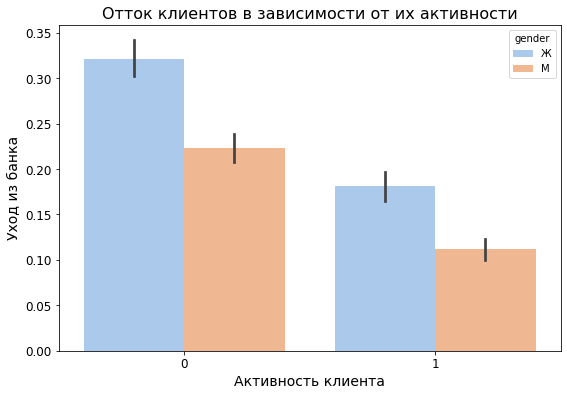

In [ ]:
barplot_hue('loyalty','churn', 'gender')
labels('Активность клиента', 'Уход из банка', 'Отток клиентов в зависимости от их активности')

Как и ожидалось, более активные пользователи чаще остаются в банке, поэтому стоит уделять внимание людям, которые реже обращаются в банк. Женщины гораздо активнее, чем мужчины. 

**Выводы:**
Стоит уделить особое внимание людям, которые приостанавливают свою активность в банке: скорее всего, скоро они могут уйти. 

Абсолютно все люди, имеющие четыре банковских продукта, покидают его. Вероятно, есть смысл пересмотреть обслуживание более редких предложений. 

**Общие выводы по оттоку:**
Клиенты, которые чаще всего покидают банк: 
* мужчины (в **1,5** раза чаще, чем женщины)
* люди в возрасте **51-65** (в **шесть** раз чаще, чем молодежь)
* жители Ростова (в **два** раза чаще, чем в Ярославле, хотя численность в **два** раза меньше)
* пользователи с **высоким доходом** (более **20%** всех пользователей)
* клиенты с **низким балансом** на счету (на **60%** чаще, чем с высоким балансом)
* **100%** пользователей с **четырьмя** продуктами в банке и **80%** - с **тремя**
* **неактивные** пользователи (примерно в **1,7** раз чаще, чем активные

Соответственно, **рекомендации** на текущий момент такие: 
* проанализировать текущие продукты и услуги, которыми чаще всего пользуются люди среднего возраста и определить, в каких чаще бывает просадка
* сравнить уровень сервиса, а также региональные уникальные предложения в Ярославле и Ростове
* оценить проблемы, возникающие у людей с высоким доходом: безопасность хранения средств, возможность инвестиций и т.д.
* регулярно отслеживать активность пользователей и текущий уровень баланса на счету - если они начали меняться в худшую сторону, можно запросить обратную связь от клиента или предложить новую услугу
* обратить внимание на редкие услуги, которые люди могут брать в дополнение к уже имеющимся у них продуктам: с их обслуживанием могут быть проблемы

## Сегментация пользователей

Разделим текущих клиентов на два сегмента: те, у кого в банке только один продукт и те, у кого их два (это основная масса пользователей) и проанализируем их. 

In [ ]:
segmented_data = data[(data['products']==1)|(data['products']==2)]
segmented_data['segments'] = segmented_data['products'].apply(lambda x: 'Segment 1' if x==1 else 'Segment 2')

/tmp/ipykernel_147/3510142353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_data['segments'] = segmented_data['products'].apply(lambda x: 'Segment 1' if x==1 else 'Segment 2')


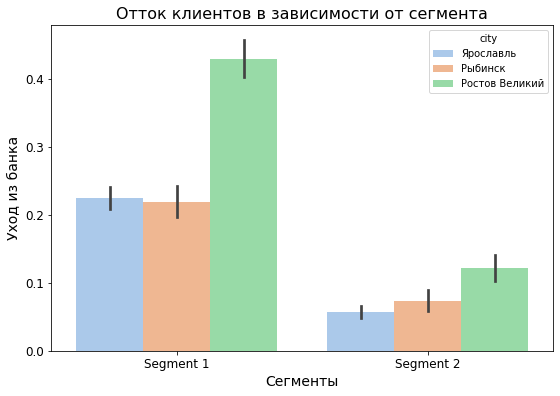

In [ ]:
#посмотрим на отток клиентов в разных сегментах и городах
barplot_hue('segments', 'churn', 'city',data = segmented_data)
labels('Сегменты', 'Уход из банка', 'Отток клиентов в зависимости от сегмента')

Пользователи с одним продуктом чаще покидают банк, чем те, у кого их два. Выглядит логично, так как люди, покупающие еще одну услугу, скорее всего, более лояльны к компании. Как и отмечали ранее, проблема ухода в Ростове более выражена.

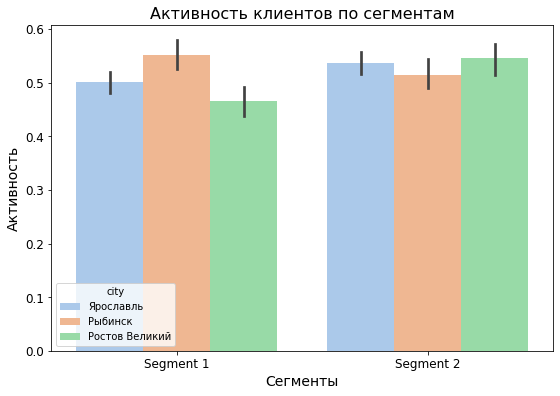

In [ ]:
barplot_hue('segments', 'loyalty', 'city',data = segmented_data)
labels('Сегменты', 'Активность', 'Активность клиентов по сегментам')

Как и ожидалось, активность клиентов с двумя продуктами выше, чем с одним. Причем в Рыбинске активность первого сегмента выше всех, а второго - ниже всех. Обратная ситуация в Ростове: люди с двумя продуктами активнее, однако отток в этом городе гораздо выше, чем в других.

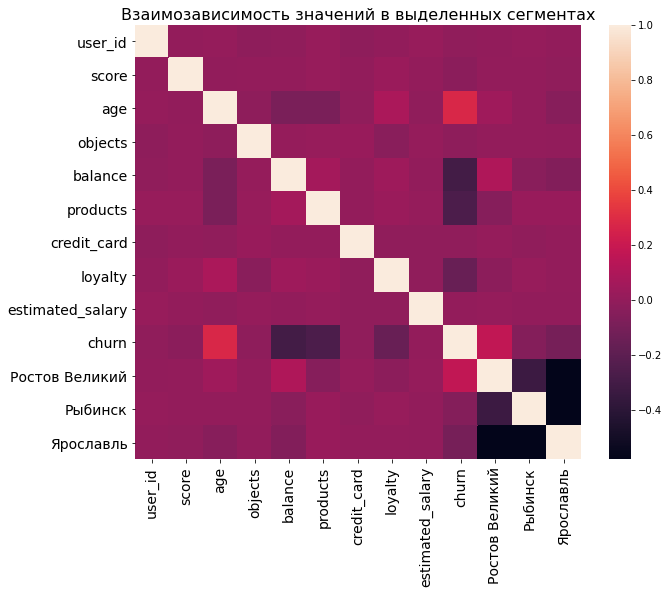

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(segmented_data.corr())
labels('', '', 'Взаимозависимость значений в выделенных сегментах', ticks_fontsize = 14, rotation = 90)

По хитмэпу видно, что количество продуктов коррелирует с уходом, возрастом (отрицательная зависимость), с балансом на счете и активностью пользователей (положительная зависимость).

Что касается оттока, он зависит от возраста(прямая корреляция), баланса, количества продуктов и активности (обратная корреляция). 

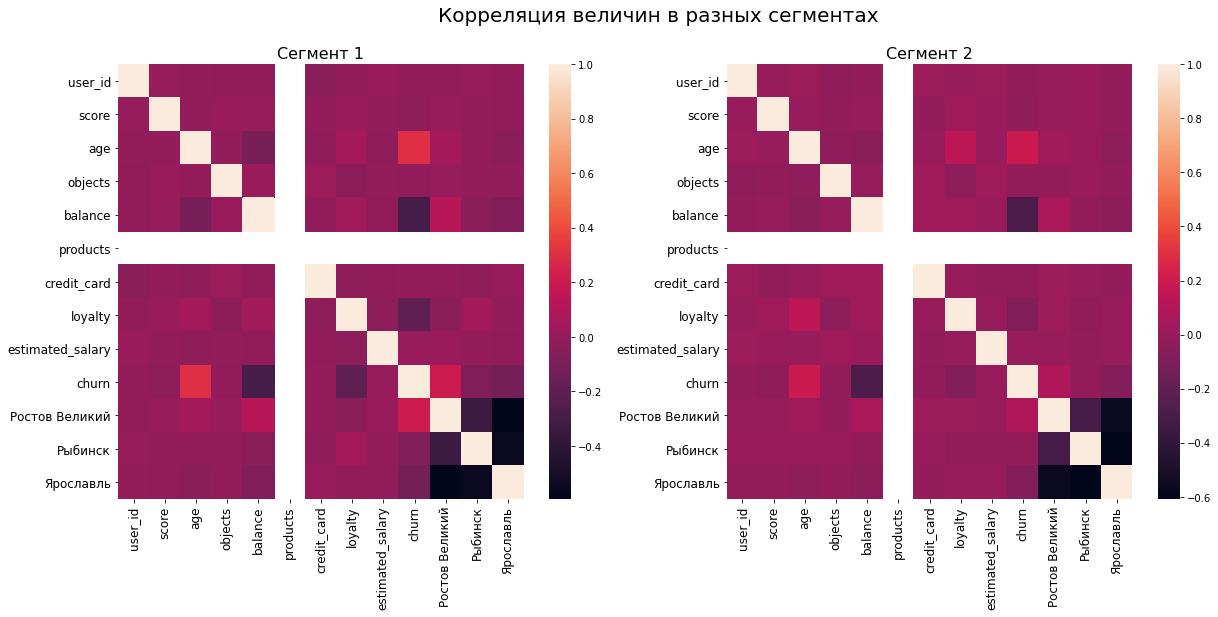

In [ ]:
#посмотрим на отдельные хитмэпы по сегментам
plt.figure(figsize=(20,8))
plt.suptitle('Корреляция величин в разных сегментах', fontsize = 20)

plt.subplot(121)
sns.heatmap(segmented_data[segmented_data['segments']=='Segment 1'].corr())
labels('','','Сегмент 1', rotation = 90)

plt.subplot(122)
sns.heatmap(segmented_data[segmented_data['segments']=='Segment 2'].corr())
labels('','','Сегмент 2', rotation = 90)

В первом сегменте проблемы ухода более выражены, во втором же основная проблема в меньшем количестве клиентов. Значит, задача в том, чтобы максимально переводить пользователей из первого сегмента во второй, параллельно устраняя недостатки обслуживания в отношении часто уходящих категорий людей.

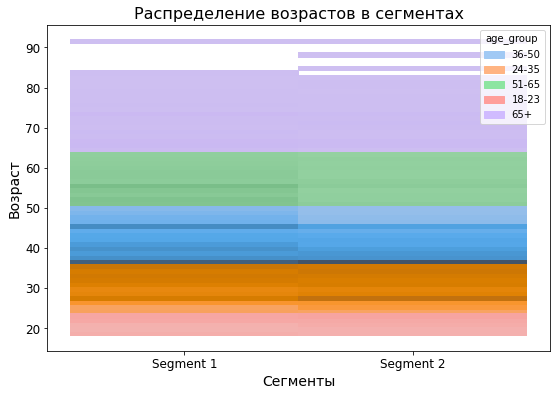

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x = 'segments', y = 'age', hue = 'age_group',data = segmented_data)
labels('Сегменты', 'Возраст', 'Распределение возрастов в сегментах')

В основном возраст средний, однако в первом сегменте больше людей старшего возраста (до 55 лет). Зато во втором сегменте есть люди от 85-90 лет, которых совсем нет в первом. Скорее всего, в банке есть дополнительные продукты для пенсионеров, которые оформляются в дополнение к основному счету. 

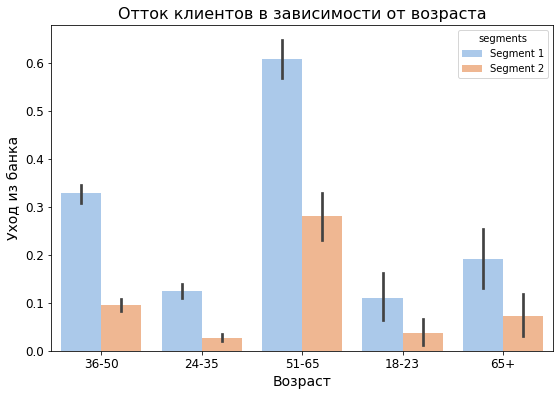

In [ ]:
#посмотрим, как распределяется отток по сегментам в зависимости от возраста
barplot_hue('age_group','churn','segments',data = segmented_data)
labels('Возраст', 'Уход из банка', 'Отток клиентов в зависимости от возраста')

График оттока по возрастам похож на тот, что мы делали на полных данных: больше всего людей покидают банк в возрасте 51-65 лет, а также 36-50 лет, и в первом сегменте это выражено особенно. 

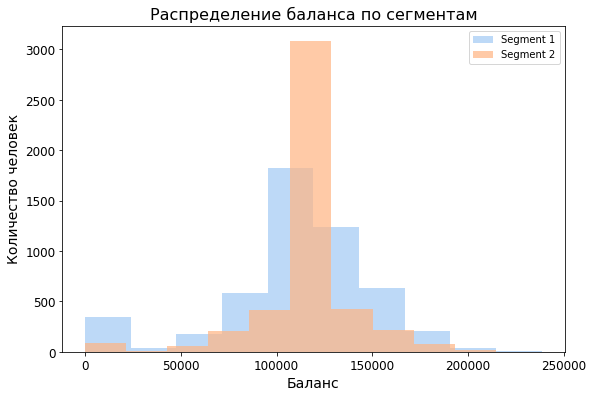

Суммарный баланс в сегментах: segments
Segment 1    5.673124e+08
Segment 2    5.319782e+08
Name: balance, dtype: float64


In [ ]:
plt.figure(figsize=(9,6))
segmented_data.groupby('segments')['balance'].plot(kind = 'hist', alpha = 0.7)
labels('Баланс', 'Количество человек', 'Распределение баланса по сегментам')
plt.legend()
plt.show()

print('Суммарный баланс в сегментах:',segmented_data.groupby('segments')['balance'].sum())

Суммарный баланс в разных сегментах не сильно отличается, хотя распределение немного разное: во втором чаще всего встречаются цифры примерно от 110 до 130 тысяч, в первом суммы рассредоточены между 90 и 140 тысячами.   
Также на графике виден небольшой выброс в низких балансах: от 0 до 25 тысяч. Нулевой баланс проставлен нами ранее для людей, покинувших банк, и, как мы видели ранее, в первом сегменте их больше. 

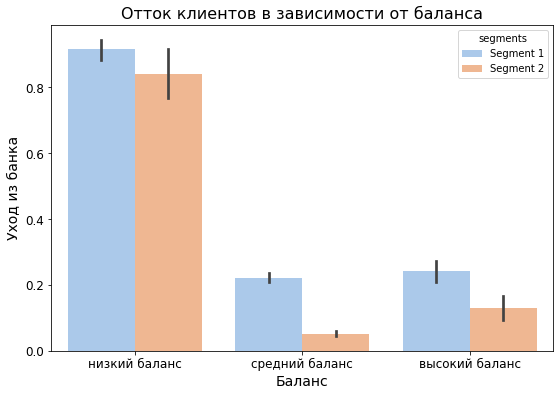

In [ ]:
barplot_hue('balance_group','churn', 'segments', data = segmented_data)
labels('Баланс', 'Уход из банка', 'Отток клиентов в зависимости от баланса')

**Выводы:**
* клиенты с одним продуктов чаще покидают банк, чем с двумя продуктами (примерно в **3,5** раза)
* активность клиентов с двумя продуктами выше
* в первом сегменте больше людей старшего возраста (до 55 лет), самый высокий возраст чаще встречается у людей второго сегмента
* второй сегмент чуть ниже по суммарному балансу, а также более равномерно распределен (в разрезе баланса на счете), чем первый.
* в первом сегменте уходят чаще всего люди с низким балансом (почти в **4** раза чаще)

В целом, "проблемные" категории клиентов одинаковы у обоих сегментов. Задача банка: расширять количество клиентов во втором сегменте, при этом устраняя текущие недостатки, из-за которых происходит отток.

## Статистический анализ данных. Проверка гипотез

Проверим поставленные гипотезы разными статистическими методами.

### Гипотеза о различии среднего дохода в разных сегментах

Формулируем гипотезу:

H0: Средний доход клиентов, которые пользуются двумя продуктами, и тех, у кого только один продукт, равны.  
H1: Средний доход клиентов, которые пользуются двумя продуктами, и тех, у кого только один продукт, различаются.

In [ ]:
#проверим гипотезу с помощью t-теста (равенство среднего двух генеральных совокупностей)
array_1 = segmented_data[segmented_data['segments']=='Segment 1']['estimated_salary']
array_2 = segmented_data[segmented_data['segments']=='Segment 2']['estimated_salary']

results = st.ttest_ind(array_1, array_2)
#задаем уровень статистической значимости
alpha = .05

print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.41047183624949335
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
Гипотеза о различии доходов в сегментах 1 и 2 не может быть подтверждена, следовательно количество продуктов в банке не зависит от зарплаты клиента.

### Гипотеза о равенстве долей пользователей с кредитными картами

Формулируем гипотезу:

H0: Доли клиентов с кредитной картой, имеющих один продукт и клиентов, у которых их два, равны.   
H1: Доли клиентов с кредитной картой, имеющих один продукт и клиентов, у которых их два, различаются.

In [ ]:
#проверим гипотезу с помощью z-критерия (разница между пропорциями)
sample_1 = data[(data['credit_card']==1)&(data['products']==1)]['user_id'].count()
sample_2 = data[(data['credit_card']==1)&(data['products']==2)]['user_id'].count()

successes = sample_1, sample_2
trials = data[data['products']==1]['user_id'].count(), data[data['products']==2]['user_id'].count()

p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

difference = p1 - p2 
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)  
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.7130897285055979
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:**  
Гипотеза о равенстве долей пользователей с кредитными картами с разным количеством карт может быть подтверждена.

## Выводы и рекомендации

**Выводы** 

Мы проанализировали данные банка "Метанпромбанк" о 10000 пользователей в трех городах: Ярославле, Ростове Великом и Рыбинске.   
Данные целые и чистые, в верном формате. Имеется только проблема со сбором информации о текущем балансе пользователя в Ярославле и Рыбинске. 

Основная масса клиентов - люди среднего возраста (24-50 лет) с одним или двумя продуктами в банке и зарплатой в среднем 100 000. 

При анализе оттока пользователей было выявлено, что основные претенденты имеют следующие характеристики:
* **мужчины** (в 1,5 раза чаще покидают банк, чем женщины)
* люди **в возрасте 51-65** (в шесть раз чаще, чем молодежь)
* жители **Ростова** (в два раза чаще, чем в Ярославле, хотя численность в два раза меньше)
* пользователи **с высоким доходом** (более 20% всех пользователей)
* клиенты **с низким балансом** на счету (на 60% чаще, чем с высоким балансом)
* 100% пользователей **с четырьмя продуктами** в банке и 80% - с тремя
* **неактивные** пользователи (примерно в 1,7 раз чаще, чем активные)

Также мы провели сегментацию клиентов по количеству продуктов: Сегмент 1 - те, кто имеет один продукт в банке, Сегмент 2 - два продукта. Анализируя эти группы, были получены выводы об их различии:
* клиенты с одним продуктом **чаще покидают** банк, чем с двумя (примерно в 3,5 раза)
* **активность** клиентов с двумя продуктами выше
* в первом сегменте больше людей **старшего возраста (до 55 лет)**, хотя **самый высокий возраст** чаще встречается у людей второго сегмента
* второй сегмент чуть ниже по **суммарному балансу**, а также более равномерно распределен (в разрезе баланса на счете), чем первый
* категории, которые покидают банк, одинаковы в обоих сегментах, поэтому задача - расширять количество людей во втором сегменте

**Рекомендации** 

1. Оценить уровень сервиса и обслуживание уникальных продуктов **в Ростове**, чтобы понять, с чем может быть связан сильный отток клиентов.
2. Регулярно отслеживать клиентов **с низким уровнем активности и балансом** и собирать обратную связь и предложения по улучшению работы. 
3. Так как активность пользователей **с одним продуктом** ниже, а отток - выше, есть смысл отдельно работать с этим сегментом людей и предложить им услуги, которые могут их заинтересовать.
4. Все клиенты **с четырьмя продуктами** уходят, следовательно, следует обратить особое внимание на условия и сервис по редким услугам, которыми пользуется небольшое количество людей (это могут быть инвестиции, валютные операции, брокерские услуги, доверительное управление капиталом и т.п.)
5. Проработать интересные предложения для категорий, которые чаще других уходят из банка **(люди старшего возраста и пользователи с низким балансом)**


**Предложения для клиентов разных сегментов**  

**Сегмент 1**  
Мы отметили сильное расхождение в цифрах по людям в возрасте от 51 до 65 лет. Они покидают банк в три раза чаще, чем люди среднего возраста, хотя их численность практически в 3,5 раза ниже по сравнению с этой же категорией. Это возраст пенсионеров и предпенсионеров, в этот период их доходы могут снижаться, однако они все же имеют постоянные зачисления и способны более финансово грамотно относиться к своим средствам. Здесь будут интересны услуги, связанные со сбережением средств, страховыми продуктами, а также льготами или программами лояльности. Например, **Мультикарта** с процентным вкладом и кэшбеком на некоторые категории товаров, которую можно привязать к зарплатным/социальным выплатам. Чтобы выделить ее среди других услуг/банков, можно предложить дополнительные бесплатные услуги: консультации юриста, неограниченные звонки на определенные номера, база вакансий от проверенных компаний, и т.п.

Одной из основных причин нежелания людей хранить деньги на балансе своего счета может быть недоверие к банку (и основная часть дохода хранится в другом месте), либо невозможность откладывания средств. В этом случае самым оптимальным подходом, помимо прокачки сервиса и репутации банка, будет предложить оформить **Накопительный счет** с более привлекательными ставками, чем у конкурентов. Чтобы не терять в выручке, а также мотивировать клиента вкладывать больше средств, ставки должны быть накопительными в зависимости от суммы вложений. 

**Сегмент 2**  
Для этого сегмента также подойдут описанные выше предложения, так как категории клиентов, покидающих банк, практически одинаковы в обоих сегментах. И все же стоит сделать упор на людях в возрасте (от 51 года), так как в этом сегменте таких клиентов меньше, а уходят они гораздо чаще других возрастных категорий. 